# Introducción a Python

## Microtemas

Hay mucho que hablar, aprender y codificar con Python. Una revisión completa del lenguaje y sus aplicaciones requeriría de dos cursos semestrales. Para concretar esta breve introducción, a continuación se presenten tres microtemas que con los conocimientos adquiridos hasta el momento bien podrás profundizar al revisar la documentación y tutoriales. Los microtemas son:
- **Sympy**: Python para el álgebra computacional.
- **Multithreading**: Elaboración y ejecución de multiples hilos con Python
- **Numba**: Aceleración de código Python con compilación de código.

### Sympy

**Sympy es una biblioteca de Python para matemática simbólica**. Posicionado actualmente en un sistema de álgebra computacional (CAS) con prestaciones de mantenimiento de código tan simple como sea posible para que sea comprensible y extendible. Sympy est{a escrito totalmente en Python y no requiere bibliotecas adicionales. El proyecto comenzó en 2005 y lanzado al público en 2007 y en el que han contribuido cientos de personas.

In [1]:
from IPython.display import IFrame
IFrame('https://www.sympy.org/en/index.html', width='100%', height=350)

In [2]:
from IPython.display import IFrame
IFrame('https://docs.sympy.org/latest/index.html', width='100%', height=350)

Otros CAS conocidos son Mathematica y Maple, sin embargo ambos software son privativos y de pago. Vamos revisar brevemente en este notebook:
- Crear símbolos y expresiones
- Manipular expresiones (simplificación, expansión)
- Calcular derivadas e integrales
- Límites y desarrollos de serie
- Resolución de EDO's
- Matrices

#### Instalación 
`conda install sympy`

`conda update sympy`

#### Creación de símbolos

In [3]:
# Importar módulos de sympy y todos sus módulos
from sympy import *

In [4]:
# Importar módulos de sympy, activar latex, crea variables
# para utilizarlas en la sesión
from sympy import init_session
init_session(use_latex = True)

IPython console for SymPy 1.11.1 (Python 3.10.10-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [6]:
# variable no definida
# debe crearse
a = 2 * b

NameError: name 'b' is not defined

Antes de usar un variable en Sympy debe definirse como símbolo y luego utilizarlo: 

In [8]:
# Crear un símbolo
a = symbols('a')
a

In [9]:
# Número Pi
(a + pi)**2

In [10]:
# Unidad imaginaria
1 + 2*I

In [11]:
# Número e
E ** 2

In [12]:
# tipo de a
type(a)

sympy.core.symbol.Symbol

Puedo operar con a y asignar a otra variable

In [13]:
b = 2 * a
type(b)

sympy.core.mul.Mul

$b$ es el resultado de una multiplicación por lo que adquiere ese tipo símbolo resultado de una multiplicación.

In [14]:
b = 2.
type(b)

float

Si sobre-escribo el valor de $b$ esta variable adquiere un nuevo tipo

In [15]:
# creación de símbolos
α, β = symbols('α β')
α, β

In [16]:
c_t = symbols('c_t')
c_t

In [17]:
# Creamos símbolos reales
x, y, z, t = symbols('x, y, z, t')
x, y, z, t

In [18]:
x.assumptions0

{'commutative': True}

In [19]:
# creamos definiciones para un símbolo
x = symbols('x', real = True, positive = True)
x

In [20]:
x.assumptions0

{'real': True,
 'extended_real': True,
 'infinite': False,
 'imaginary': False,
 'complex': True,
 'commutative': True,
 'hermitian': True,
 'finite': True,
 'positive': True,
 'nonnegative': True,
 'extended_nonzero': True,
 'nonzero': True,
 'extended_negative': False,
 'extended_nonnegative': True,
 'nonpositive': False,
 'negative': False,
 'extended_nonpositive': False,
 'zero': False,
 'extended_positive': True}

#### Expresiones

Creemos algo como $cos^2(x) + sin^2(x)$

In [21]:
cos(x)**2 + sin(x)**2

In [22]:
sqrt(z**2)

In [23]:
simplify(_)  # ¿simplify = simpify?

In [24]:
y = symbols('y', real=True)
simplify(sqrt(y**2))

In [25]:
sympify(sqrt(x**2))

#### Sustituciones

In [26]:
sin(z)

In [27]:
_.subs(z, 1 + x ** 2)

In [28]:
# Sustituye x, y
(sin(x)**2 + cos(y) ** 2).subs({x:1+z, y:1-z})

In [29]:
# remplaza funciones
sin(x).replace(sin, exp)

In [30]:
# sustituye un valor particular y reduce
# la expresion, hace x = pi
(sin(x) + 3 * x).subs(x, pi)

In [31]:
# evalua expresión
_30.evalf()

In [74]:
# muestra la ayuda
_30.evalf?

In [33]:
# Equivalente a la anterior
N(_30)

#### Simplificación

Sympy ofrece numerosas funciones para simplificar y manipular xpresiones. Estre otras tantas funciones, las que destacan son:
- expand()
- factor()
- collect()
- apart()
- cancel()

Existen también funciones específicas de simplificación para funciones trigonoméricas, potencias y logaritmos.

$(x^3 + 3y + 2)^2 \to x^6 + 6 x^3 𝑦 + 4x^3 + 9y^2 + 12y + 4 $ 

In [35]:
x, y, z, t = symbols('x y z t')

In [36]:
(x**3 + 3 * y + 2) ** 2

In [37]:
expand(_)

In [38]:
_36.expand()

In [39]:
apart?

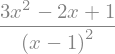

In [40]:
(3 * x ** 2 - 2 * x + 1 ) / (x-1) ** 2 

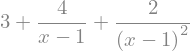

In [41]:
apart(_)

Un tutorial muy bueno del uso de Sympy es presentado por **Juan Luis Cano**, lo puedes consultar en Youtube y consta de varias partes, puedes iniciar con [Sympy: Introducción y comandos básicos](https://www.youtube.com/watch?v=OGQRcYVys1Q) de donde tomé el contenido de este notebook.  

### Multithreading

Los hilos o *threads* son procesos ligeros que se ejecutan el mismo espacio de memoria. Esto complica el uso de variables dado que múltiples hilos pueden escribir en la misma localidad de memoria.

No obstante, el intérprete de Python nos proporciona un mecanismo de seguridad para los hilos (_thread-safe mechanism_): GIL (Global intepreter Lock) el interprete global de bloqueo. Este mecanismo previene de conflictos entre hilos al ejecutar una sola instrucción al mismo tiempo.

El intérprete de bloque global evita el paralelismo de hilos que se ejecutan en múltiples núcleos, así la implementación de hilos en python es mucho más útil en concurrencia en servidores web. 

Múltiples hilos pueden vivir en el mismo proceso y en el mismo espacio, cada hilo hará una tarea específica con base en su propio código y su segmento de memoria (*stack*), su apuntador de instrucciones y la memoria compartida (*heap*).

![title](threads1.png)

`Multithreading` es una biblioteca de Python que sirve de interface de alto nivel para la creación de hilos.

In [46]:
import threading
import time

def calc_square(numbers):
    for num in numbers:
        print('Square:' , num * num)
    
def calc_quad(numbers):
    for num in numbers:
        print('Quad:' , num * num * num * num)

numbers = [2, 3, 5, 6]

t = time.time()
calc_square(numbers)
calc_quad(numbers)
print("time: " + str(time.time()-t)) 

Square: 4
Square: 9
Square: 25
Square: 36
Quad: 16
Quad: 81
Quad: 625
Quad: 1296
time: 0.0001068115234375


Cada función `calc_square()`es invocada y ejecutada y al finalizar su ejecución es invocada y ejecutada la función `calc_quad()`, se trata de una ejecución secuencial.
![title](threads_serial.png)

Ahora vamos a crear dos `threads`, cada uno ejecutará las funciones anteriores:

In [51]:
import threading
import time

def calc_square(numbers):
    for num in numbers:
        time.sleep(0.2)
        print('Square:' , num * num)
    
def calc_quad(numbers):
    for num in numbers:
        time.sleep(0.2)
        print('Quad:' , num * num * num * num)
    
if __name__ == "__main__":
    numbers = [2, 3, 5, 6]
    
    t = time.time()
    
    thread1 = threading.Thread(target=calc_square, args=(numbers,))
    thread2 = threading.Thread(target=calc_quad, args=(numbers,))
    
    # Ejecuta los dos hilos concurrentemente 
    thread1.start()
    thread2.start()
    
    # Retoma los hilos y los une de vuelta al proceso padre
    # que es este programa
    thread1.join()
    thread2.join()
    
    print("time: " + str(time.time()-t)) 

Square: 4
Quad: 16
Square: 9
Quad: 81
Square: 25
Quad: 625
Square: 36
Quad: 1296
time: 0.8041832447052002


En este caso, cada hilo o `thread` es ejecutado de manera **concurrente**:

![title](threads2.png)

El sistma operativo inicia la ejecución de cada hilo y la planifica de forma intercalada de acuerdo a la tabla de procesos presentes en el sistema. 

#### Creación de hilos diversos

Como todo en Python es un objeto, es posible crear multiples hilos al estilo Python usando iteradores o ciclos.

In [ ]:
import threading

def worker(number):
    time.sleep(0.1)
    print("Soy el hilo: " + str(number))
    
thread_list = []
for i in range(5):
    thread = threading.Thread(target=worker, args=(i,))
    thread.start()
    thread_list.append(thread)
    
# regresa cada hilo al hilo principal
for thread in thread_list:
    thread.join()
    
print("Fin proceso principal")

#### Crea hilos como instancias de clase

Los hilos en Python están implementados como objetos de tipo `threading.Thread`

In [53]:
import time
import threading

# el hilo es definido por una clase
class CountdownThread(threading.Thread):
    
    # se hereda de Thread y se redefine run()
    def __init__(self, count):
        threading.Thread.__init__(self)
        self.count = count
        
    def run(self):
        while self.count > 0:
            print("Conteo en reversa: ", self.count)
            self.count -= 1
            time.sleep(1)
        return
    
t1 = CountdownThread(10)
t1.start()

t2 = CountdownThread(20)
t2.start()

Conteo en reversa:  10
Conteo en reversa:  20
Conteo en reversa:  9
Conteo en reversa:  19
Conteo en reversa:  8
Conteo en reversa:  18
Conteo en reversa:  17
Conteo en reversa:  7
Conteo en reversa:  16
Conteo en reversa:  6
Conteo en reversa:  15
Conteo en reversa:  5
Conteo en reversa:  4
Conteo en reversa:  14
Conteo en reversa:  3
Conteo en reversa:  13
Conteo en reversa:  2
Conteo en reversa:  12
Conteo en reversa:  1
Conteo en reversa:  11
Conteo en reversa:  10
Conteo en reversa:  9
Conteo en reversa:  8
Conteo en reversa:  7
Conteo en reversa:  6
Conteo en reversa:  5
Conteo en reversa:  4
Conteo en reversa:  3
Conteo en reversa:  2
Conteo en reversa:  1


In [54]:
import threading
import time

class MyThread(threading.Thread):
    
    def __init__(self,  number):
        super(MyThread, self).__init__()
        self.number = number
    
    def run(self):
        time.sleep(0.1)
        print("Soy el hilo: " + str(self.number))
    
thread_list = []
for i in range(5):
    thread = MyThread(i)
    thread_list.append(thread)
    thread.start()

Soy el hilo: 0
Soy el hilo: 2
Soy el hilo: 1
Soy el hilo: 3
Soy el hilo: 4


#### Ejecutor de hilos (thread pool executor)

In [56]:
import concurrent.futures

def worker(number):
    time.sleep(0.1)
    print("Soy el hilo: " + str(number))
    return ("Done...")

with concurrent.futures.ThreadPoolExecutor() as executor:
    t1 = executor.submit(worker, 1)
    print(t1.result())
    t2 = executor.submit(worker, 2)
    print(t2.result())

Soy el hilo: 1
Done...
Soy el hilo: 2
Done...


#### Dificultades con los hilos

Existen diversas problemáticas a trabajar con multitarea:
+ Los hilos no tienen un comportamiento determinista
+ La planificación la realiza el sistema operativo, no el intérprete de Python
+ Es impredecible la ejecución de un hilo, por lo tanto el código debe ser seguro para cada hilo (*thread safe*)
+ Los hilos usan bloqueo de recursos de E/S (ejemplo, sistema de archivos) para tenerlos disponibles
+ Se requieren bloqueos (*locks*) para sincronizar el acceso a variables compartidas de lo multihilos
+ La sincronización usando bloqueos es difícil y propenso a errores

### Numba

Python sacrifica velocidad por flexibilidad. Tener un lenguaje dinámico, flexible, con múltiples objetos implementados y reutilización de código conduce a ejecuciones de código lentas. Cuando en ciertas aplicaciones el rendimiento (_performance_) es necesario se tiene la alternativa de acelerar código Python con el paquete **Numba**

- Numba es un compilador para Python.
- Enfocado a funciones numéricas que permite acelerar aplicaciones transcribiendo funciones escritas directamente en Python a funciones con alto rendimiento.
- Numba genera código máquina optimizado desde la sintaxis de Python usando el compilador LLVM.
- Con unos simples cambios, el código de Python puede ser optimizado "just-in-time" para obtener rendimiento similar a C, C++ sin tener que cambiar el lenguaje.

#### Características de Numba
- **Compilador de funciones:** Numba compila funciones, no aplicaciones completas, sólo parte de ellas. Básicamente, Numba es otro módulo de Python para mejorar el rendimiento de funciones contenidas en el código.
- **Just-in-time:** (Transición dinámica) Numba transcribe el código en bits (bytecode o código intermedio) a código máquina inmediatamente antes de su ejecución para incrementar la velocidad de ejecución.
- **Enfocado a algoritmos numéricos:** Numba está enfocado a datos y cálculos numéricos, Int, Float, Complex. 

#### Otras opciones para aceleración de código

- CUDA C/C++
- PyCUDA
    - Es la forma más eficiente de usar CUDA desde Python
    - Requiere programar en C el código en Python, muchos cambios se requieren
- Numba
    - Menos eficiente que PyCUDA
    - Permite escribir código Python y optimizarlo con pocas modificiciones
    - Optimiza código para CPU y GPU

In [1]:
import numba
from numba import jit
import numpy as np
import math
import random

In [60]:
random.seed(42)

#### Primeros pasos: Compilar código en CPU
Numba optimiza funciones en la CPU, para esto se utilizan *decoradores* (macros que modifican funciones). Veamos el uso del `@jit` 

In [6]:
@jit()
def hypot(x, y):
    return math.sqrt(x*x + y*y)

/tmp/ipykernel_141827/3662081512.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit()


In [8]:
# Función de Numba
hypot(3.0, 4.0)

5.0

Numba escribe la implementación original de la función en `.py_func`, la cual es posible utilizar. 

In [9]:
# Función original en Python
hypot.py_func(3.0, 4.0)

5.0


Naturalmente, es importante medir el rendimiento del código escrito y verificar si realmente Numba funciona correctamente respecto a la diferencia en tiempo de la implementación de Python y la implementación de Numba.

In [10]:
# Función de Python
%timeit hypot.py_func(3.0, 4.0)

129 ns ± 1.62 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [11]:
# Función de Numba
%timeit hypot(3.0, 4.0)

127 ns ± 1.16 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Adicionalmente, la biblioteca `math` también incluye la función `hypot`:

In [12]:
# math function
%timeit math.hypot(3.0, 4.0)

88.9 ns ± 0.459 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Nótese que  la función `math.hypot` es más rápida que Numba. Esto se debe a que Numba introduce cierta sobrecarga en la llamada a la función que supera la sobrecarga de la llamada a la función de Python, para funciones que se ejecutan rápidamente se verán afectadas por esta sobrecarga.
Sin embargo, si se invocan funciones de Numba desde otras funciones, esta sobrecarga puede disminuir considerablemente, algunas veces desaparece si el compilador integra la llamada de Numba dentro de otra función. Es recomendable verificar la acelaración que ofrece Numba.

#### Ejemplo con Fractales

Vamos a dibujar un fractal. Un fractal es una figura que sigue un patrón geométrico que se sucede hasta el infinito. Los fractales se construyen mediante múltipleas números complejos que se son semejantes a diferentes escalas. Los fractales se construyen mediante un proceso iterativo: $z_{n+1} = z_n + c$


3.06 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


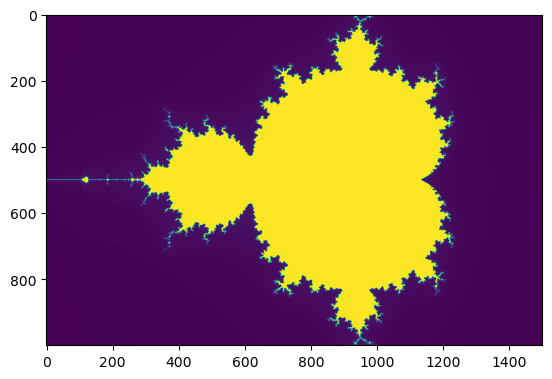

In [13]:
from matplotlib.pylab import imshow, ion

def mandel(x, y , max_iters):
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z +c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
        
    return 255

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y,x] = color
            
    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
%timeit create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
img = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
imshow(img)
    

/tmp/ipykernel_141827/2370836737.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def mandel(x, y , max_iters):
/tmp/ipykernel_141827/2370836737.py:14: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def create_fractal(min_x, max_x, min_y, max_y, image, iters):


32.2 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


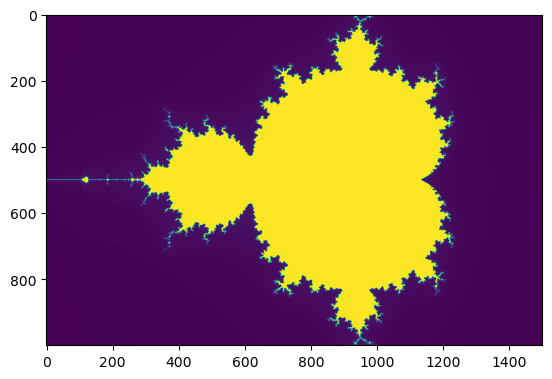

In [3]:
@jit
def mandel(x, y , max_iters):
    i = 0
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z +c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
        
    return 255

@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y,x] = color
            
    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
%timeit create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
img = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
imshow(img)